#           DATA ANALYSIS ON SMART PHONE DATA

## PROBLEM STATEMENT
## The smartphone dataset provides detailed specifications of various smartphone models, including attributes such as brand, price, rating, and features like 5G capability and battery capacity. The problem statement involves analyzing this dataset to identify trends and consumer preferences in the smartphone market. Key objectives include understanding the relationship between features and ratings, segmenting smartphones by price and performance, comparing brands, and identifying market gaps.

In [1]:
#importing  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#importing the data set
df = pd.read_csv("smartphone.csv")

In [3]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,os
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8,3.20,5000,1.0,100,12,256,6.70,120,1440 x 3216,3,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8,2.20,5000,1.0,33,6,128,6.59,120,1080 x 2412,3,android
2,samsung,Samsung Galaxy A14 5G,16499,NaN,True,False,False,exynos,8,2.40,5000,NaN,15,4,64,6.60,90,1080 x 2408,3,android
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8,2.20,5000,1.0,0,6,128,6.55,120,1080 x 2400,3,android
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8,2.60,5000,1.0,67,6,128,6.70,120,1080 x 2412,3,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8,3.00,5000,1.0,68,8,128,6.67,120,1080 x 2460,3,android
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8,2.20,5000,1.0,22,6,128,6.50,60,720 x 1600,3,android
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8,2.85,5080,1.0,67,8,256,6.60,144,1080 x 2460,3,android
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8,2.20,5000,1.0,0,6,128,6.80,60,1080 x 2400,3,android


In [4]:
df.shape

(980, 20)

In [5]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras
count,980.000000,979.000000,980.000000,980.000000,980.000000,978.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,32520.504082,70.187947,7.724490,2.323194,4763.671429,0.853783,36.194898,6.560204,141.036735,6.536765,92.256122,2.814286
std,39531.812669,24.828727,1.031482,0.669368,1124.983036,0.353504,35.798919,2.744378,107.134516,0.349162,28.988052,0.776441
min,3499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,3.540000,60.000000,1.000000
25%,12999.000000,70.000000,8.000000,2.000000,4500.000000,1.000000,15.000000,4.000000,64.000000,6.500000,60.000000,2.000000
50%,19994.500000,79.000000,8.000000,2.300000,5000.000000,1.000000,30.000000,6.000000,128.000000,6.580000,90.000000,3.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               980 non-null    object 
 1   model                    980 non-null    object 
 2   price                    980 non-null    int64  
 3   rating                   979 non-null    float64
 4   has_5g                   979 non-null    object 
 5   has_nfc                  980 non-null    bool   
 6   has_ir_blaster           980 non-null    bool   
 7   processor_brand          980 non-null    object 
 8   num_cores                980 non-null    int64  
 9   processor_speed          980 non-null    float64
 10  battery_capacity         980 non-null    int64  
 11  fast_charging_available  978 non-null    float64
 12  fast_charging            980 non-null    int64  
 13  ram_capacity             980 non-null    int64  
 14  internal_memory          9

# DATA CLEANING

In [7]:
#finding null values
df.isnull().sum()

brand_name                 0
model                      0
price                      0
rating                     1
has_5g                     1
has_nfc                    0
has_ir_blaster             0
processor_brand            0
num_cores                  0
processor_speed            0
battery_capacity           0
fast_charging_available    2
fast_charging              0
ram_capacity               0
internal_memory            0
screen_size                0
refresh_rate               0
resolution                 0
num_rear_cameras           0
os                         0
dtype: int64

In [8]:
## if null values came we can use (datasetname=datasetname.dropna())
#The dropna() method removes all rows that contain null values in the specified column
df=df.dropna()

In [9]:
# null values are corrected
df.isnull().sum()

brand_name                 0
model                      0
price                      0
rating                     0
has_5g                     0
has_nfc                    0
has_ir_blaster             0
processor_brand            0
num_cores                  0
processor_speed            0
battery_capacity           0
fast_charging_available    0
fast_charging              0
ram_capacity               0
internal_memory            0
screen_size                0
refresh_rate               0
resolution                 0
num_rear_cameras           0
os                         0
dtype: int64

### MISSING VALUES

In [10]:
# Dropping rows with any missing values
df_cleaned_rows = df.dropna()
print("\nDataFrame after dropping rows with any missing values:")
print(df_cleaned_rows)


DataFrame after dropping rows with any missing values:
    brand_name                                    model  price  rating has_5g  \
0      oneplus                            OnePlus 11 5G  54999    89.0   True   
1      oneplus                OnePlus Nord CE 2 Lite 5G  19989    81.0   True   
3     motorola                     Motorola Moto G62 5G  14999    81.0   True   
4       realme                       Realme 10 Pro Plus  24999    82.0   True   
5      samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0   True   
..         ...                                      ...    ...     ...    ...   
975   motorola               Motorola Moto Edge S30 Pro  34990    83.0   True   
976      honor                              Honor X8 5G  14990    75.0   True   
977       poco          POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0   True   
978   motorola                     Motorola Moto G91 5G  19990    80.0   True   
979    samsung                   Samsung Galaxy M52s 

In [11]:
# Dropping columns with any missing values
df_cleaned_coloumns = df.dropna(axis=1)
print("\nDataFrame after dropping coloumns with any missing values:")
print(df_cleaned_coloumns)


DataFrame after dropping coloumns with any missing values:
    brand_name                                    model  price  rating has_5g  \
0      oneplus                            OnePlus 11 5G  54999    89.0   True   
1      oneplus                OnePlus Nord CE 2 Lite 5G  19989    81.0   True   
3     motorola                     Motorola Moto G62 5G  14999    81.0   True   
4       realme                       Realme 10 Pro Plus  24999    82.0   True   
5      samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0   True   
..         ...                                      ...    ...     ...    ...   
975   motorola               Motorola Moto Edge S30 Pro  34990    83.0   True   
976      honor                              Honor X8 5G  14990    75.0   True   
977       poco          POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0   True   
978   motorola                     Motorola Moto G91 5G  19990    80.0   True   
979    samsung                   Samsung Galaxy M

In [12]:
# Filling missing values with the mean of the column
df_filled_mean = df.fillna(df.mean())
print("\nDataFrame after filling missing values with the mean of the column:")
print(df_filled_mean)


DataFrame after filling missing values with the mean of the column:
    brand_name                                    model  price  rating  \
0      oneplus                            OnePlus 11 5G  54999    89.0   
1      oneplus                OnePlus Nord CE 2 Lite 5G  19989    81.0   
3     motorola                     Motorola Moto G62 5G  14999    81.0   
4       realme                       Realme 10 Pro Plus  24999    82.0   
5      samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0   
..         ...                                      ...    ...     ...   
975   motorola               Motorola Moto Edge S30 Pro  34990    83.0   
976      honor                              Honor X8 5G  14990    75.0   
977       poco          POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0   
978   motorola                     Motorola Moto G91 5G  19990    80.0   
979    samsung                   Samsung Galaxy M52s 5G  24990    74.0   

     has_5g  has_nfc  has_ir_blaster proce

C:\Users\chandu\AppData\Local\Temp\ipykernel_16172\3992354630.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled_mean = df.fillna(df.mean())


In [13]:
# Identifying missing data  
missing_data_count = df.isna().sum()  
print(f"Number of missing values: {missing_data_count}") 

Number of missing values: brand_name                 0
model                      0
price                      0
rating                     0
has_5g                     0
has_nfc                    0
has_ir_blaster             0
processor_brand            0
num_cores                  0
processor_speed            0
battery_capacity           0
fast_charging_available    0
fast_charging              0
ram_capacity               0
internal_memory            0
screen_size                0
refresh_rate               0
resolution                 0
num_rear_cameras           0
os                         0
dtype: int64


In [14]:
### Outlier Detection using IQR method ###
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [15]:
### Detect outliers in the 'price' column ###
outliers_price = detect_outliers_iqr(df, 'price')
print("Outliers in Price:")
print(outliers_price[['brand_name', 'model', 'price']])

Outliers in Price:
    brand_name                             model   price
14     samsung       Samsung Galaxy S23 Ultra 5G  114990
27       apple           Apple iPhone 14 Pro Max  129990
29     oneplus                    OnePlus 11 Pro   69999
37     samsung       Samsung Galaxy S22 Ultra 5G   91999
56       apple              Apple iPhone 14 Plus   74999
..         ...                               ...     ...
951     huawei  Huawei Mate 30 RS Porsche Design  214990
954     huawei                     Huawei Mate X  169000
971       oppo                      Oppo Find X6   69990
973     google                Google Pixel 8 Pro   70990
974       vivo                     Vivo X Fold 2  119990

[107 rows x 3 columns]


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

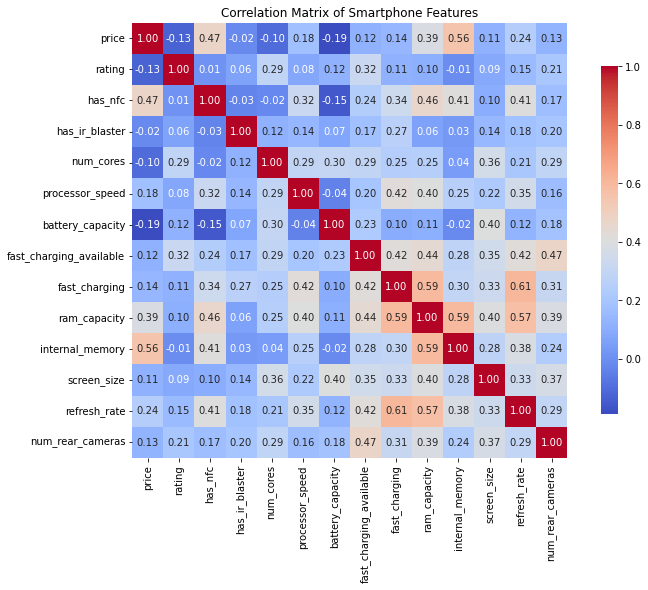

In [17]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Smartphone Features')
plt.show()

<Figure size 1080x2160 with 0 Axes>

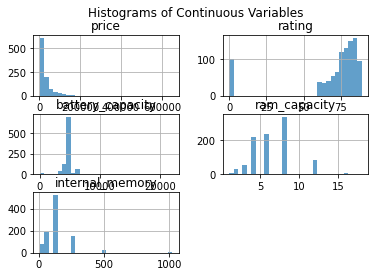

In [18]:
#Histograms
plt.figure(figsize=(15, 30))
df[['price', 'rating', 'battery_capacity', 'ram_capacity', 'internal_memory']].hist(bins=30, alpha=0.7, layout=(3, 2))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

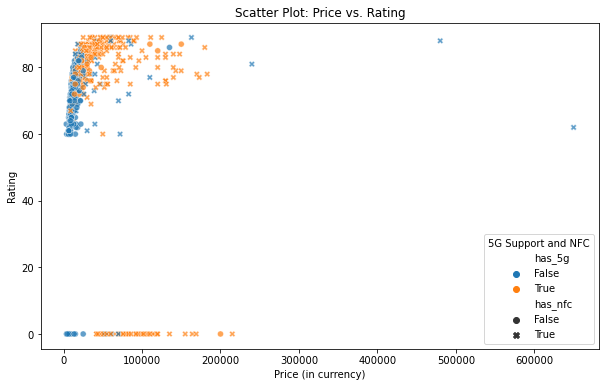

In [19]:
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rating', hue='has_5g', style='has_nfc', alpha=0.7)
plt.title('Scatter Plot: Price vs. Rating')
plt.xlabel('Price (in currency)')
plt.ylabel('Rating')
plt.legend(title='5G Support and NFC')
plt.show()

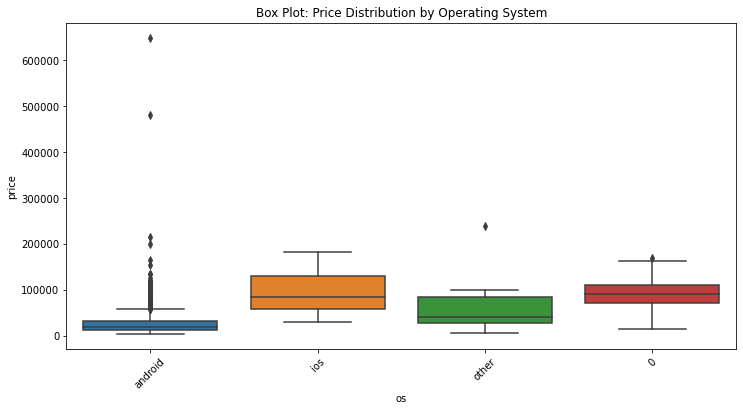

In [20]:
# Box Plot: Price Distribution by OS
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='os', y='price')
plt.title('Box Plot: Price Distribution by Operating System')
plt.xticks(rotation=45)
plt.show()

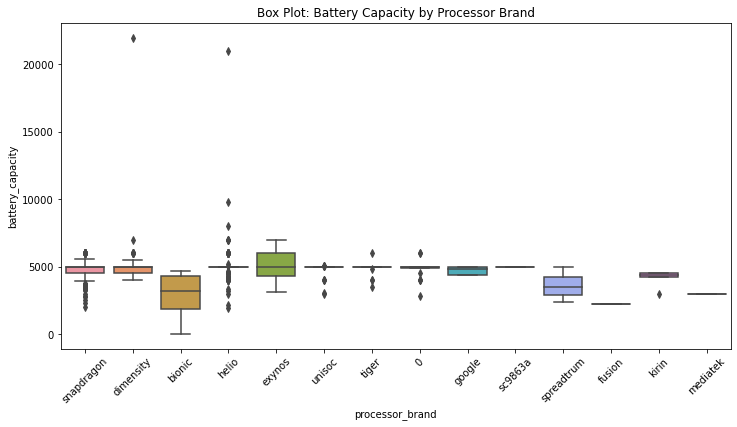

In [21]:
# Box Plot: Battery Capacity by Processor Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='processor_brand', y='battery_capacity')
plt.title('Box Plot: Battery Capacity by Processor Brand')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
               price      rating   num_cores  processor_speed  \
count     977.000000  977.000000  977.000000       977.000000   
mean    32545.400205   70.155578    7.723644         2.323060   
std     39588.678686   24.843781    1.032953         0.670356   
min      3499.000000    0.000000    0.000000         0.000000   
25%     12999.000000   70.000000    8.000000         2.000000   
50%     19990.000000   79.000000    8.000000         2.300000   
75%     35499.000000   84.000000    8.000000         2.840000   
max    650000.000000   89.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        977.000000               977.000000     977.000000    977.000000   
mean        4763.457523                 0.853634      36.189355      6.559877   
std         1126.628256                 0.353654      35.834632      2.746598   
min            0.000000                 0.000000       0.000000   

In [23]:
# Correlation Matrix
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
                            price    rating   has_nfc  has_ir_blaster  \
price                    1.000000 -0.129295  0.471803       -0.016091   
rating                  -0.129295  1.000000  0.009521        0.063680   
has_nfc                  0.471803  0.009521  1.000000       -0.031878   
has_ir_blaster          -0.016091  0.063680 -0.031878        1.000000   
num_cores               -0.104743  0.285628 -0.020123        0.118014   
processor_speed          0.175488  0.078240  0.318798        0.137950   
battery_capacity        -0.189883  0.120660 -0.152741        0.074625   
fast_charging_available  0.117042  0.319437  0.237765        0.174716   
fast_charging            0.139709  0.112448  0.336963        0.265459   
ram_capacity             0.386046  0.102959  0.457434        0.059574   
internal_memory          0.557456 -0.005506  0.412408        0.030929   
screen_size              0.113380  0.087845  0.102928        0.141134   
refresh_rate             0.244

In [24]:
import pandas as pd
from scipy import stats

In [25]:
# Hypothesis Testing: t-test
print("\nt-test: Comparing mean price between 5G and non-5G phones")
has_5g = df[df['has_5g'] == 1]['price']
no_5g = df[df['has_5g'] == 0]['price']
t_stat, p_value = stats.ttest_ind(has_5g, no_5g)
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


t-test: Comparing mean price between 5G and non-5G phones
t-statistic: 10.04
p-value: 0.0000


In [26]:
# ANOVA: Comparing mean price across operating systems
print("\nANOVA: Comparing mean price across operating systems")
groups = df.groupby('os')['price'].apply(list)
f_stat, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


ANOVA: Comparing mean price across operating systems
F-statistic: 68.07
p-value: 0.0000


In [27]:
# Correlation between price and battery capacity
print("\nCorrelation between price and battery capacity:")
corr, p_value = stats.pearsonr(df['price'], df['battery_capacity'])
print(f"Correlation coefficient: {corr:.2f}")
print(f"p-value: {p_value:.4f}")


Correlation between price and battery capacity:
Correlation coefficient: -0.19
p-value: 0.0000


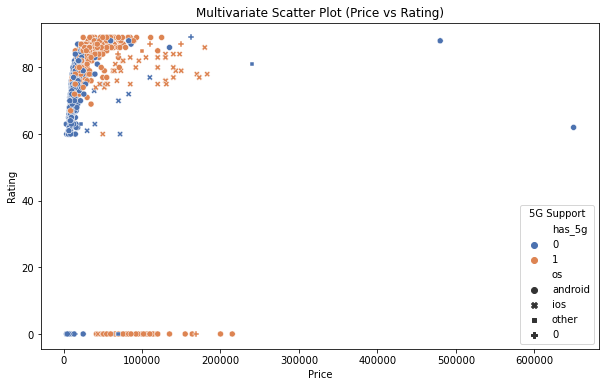

In [32]:
# Create a multivariate scatter plot with hue based on has_5g
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rating', hue='has_5g', style='os', palette='deep')
plt.title('Multivariate Scatter Plot (Price vs Rating)')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='5G Support')
plt.show()

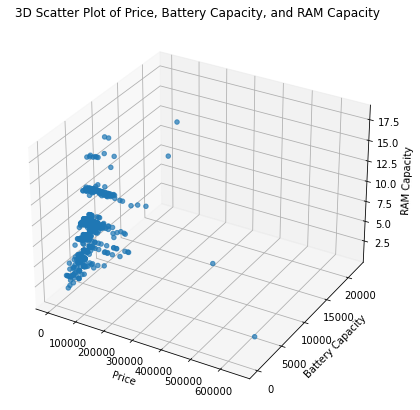

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['price'], df['battery_capacity'], df['ram_capacity'], alpha=0.7)
ax.set_xlabel('Price')
ax.set_ylabel('Battery Capacity')
ax.set_zlabel('RAM Capacity')
ax.set_title('3D Scatter Plot of Price, Battery Capacity, and RAM Capacity')

plt.show()

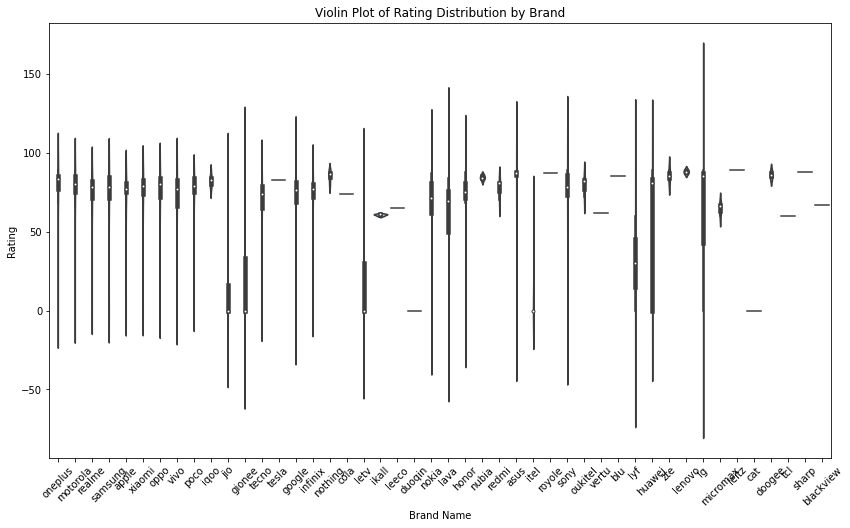

In [34]:
# Create a violin plot for rating distribution by brand
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='brand_name', y='rating', palette='muted')
plt.title('Violin Plot of Rating Distribution by Brand')
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Rating')
plt.show()